<a href="https://colab.research.google.com/github/hosseinhimself/404LLMs/blob/main/MBTI_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q -U langchain
! pip install -q langchain-google-genai
! pip install -q langchain-community

from langchain import PromptTemplate
from langchain.schema.prompt_template import format_document
from langchain.chains import LLMChain
from langchain_google_genai import ChatGoogleGenerativeAI

import ast
import os
import getpass
import matplotlib.pyplot as plt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.5/973.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.2/310.2 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.4 MB/s eta 0:00:00


In [ ]:
api_key = getpass.getpass('Gemini API Key:')
os.environ['GOOGLE_API_KEY'] = api_key

Gemini API Key:··········


In [ ]:
initial_task_prompt = '''
  As a psychologist, your goal is to help determine the MBTI (Myers-Briggs Type Indicator) of the individual by asking a series of questions.
  You need to ask {number_of_questions} questions, with answers ranging from 1 to 5, where:
    1 = Strongly Disagree
    2 = Disagree
    3 = Neutral
    4 = Agree
    5 = Strongly Agree
  These questions should delve into emotions, personality traits, and hypothetical situations. Provide the questions in the following format:
  Q1: <<question text>>
  Q2: <<question text>>
  ...
  Q20: <<question text>>
  Please only include the questions without any additional information.
  '''

welcome = '''
  **Welcome!**
  To determine your MBTI, please answer the following questions using a scale from 1 to 5, where:
  1 = Strongly Disagree
  2 = Disagree
  3 = Neutral
  4 = Agree
  5 = Strongly Agree
  '''

results_prompt = '''
  You are a psychologist tasked with determining the user's MBTI (Myers-Briggs Type Indicator) based on the questions asked.
  These questions explore preferences in how individuals perceive the world and make decisions. Answers range from 1 to 5, as follows:
  1 = Strongly Disagree
  2 = Disagree
  3 = Neutral
  4 = Agree
  5 = Strongly Agree
  Please disregard any unanswered questions or responses unrelated to the topic.
  The questions and their answers should be presented in the following Python dictionary format:
  '<<question>>':'<<answer>>', ...
  Provide the answer in the format below. MBTI types are represented by their respective letters (e.g., "I" for Introversion, "E" for Extroversion), and numbers should be floats without any "%" symbols. Do not include any additional information.
  this is an example of the answer I am looking for, answer in this specific format

  'I': 0.25, 'E': 0.75, 'S': 0.6, 'N': 0.4, 'T': 0.8, 'F': 0.2, 'J': 0.3, 'P': 0.7

  Questions and answers:

  {answers}
  '''


  **Welcome!**
  To determine your MBTI, please answer the following questions using a scale from 1 to 5, where:
  1 = Strongly Disagree
  2 = Disagree
  3 = Neutral
  4 = Agree
  5 = Strongly Agree
  


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


Q1: I often feel overwhelmed by my emotions. 5
Q2: I prefer to work independently rather than in groups. 4
Q3: I am highly imaginative and often lost in my thoughts. 1
Q4: I am a very organized and detail-oriented person. 2
Q5: I find it easy to express my feelings to others. 3
Q6: I am more interested in facts and data than in abstract concepts. 4
Q7: I am usually the one who initiates conversations and social interactions. 1
Q8: I prefer to make decisions based on logic and reason. 2
Q9: I am often described as a "free spirit" who marches to the beat of my own drum. 3
Q10: I am very sensitive to the needs and emotions of others. 2
{'I': 0.5, 'E': 0.5, 'S': 0.6, 'N': 0.4, 'T': 0.6, 'F': 0.4, 'J': 0.4, 'P': 0.6}


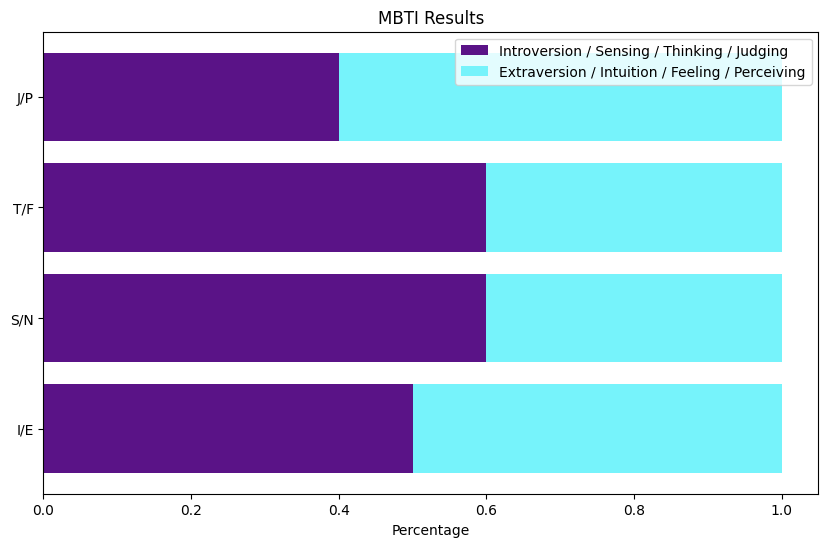

In [ ]:
llm_model = ChatGoogleGenerativeAI(model="gemini-pro",
                 temperature=0.7, top_p=0.85)

def generate_questions(number_of_questions):
  prompt = PromptTemplate(input_variables=["number_of_questions"], template = initial_task_prompt)
  # define chain
  chain = LLMChain(
      llm=llm_model,
      prompt=prompt,
  )
  questions = chain.run({'number_of_questions':number_of_questions})
  return questions.split('\n')

def show_results(answers):
  res_prompt = PromptTemplate(input_variables=['answers'], template = results_prompt)
  res_chain = LLMChain(
    llm=llm_model,
    prompt=res_prompt,
  )
  return res_chain.run({'answers':answers})

def plot_mbti_results(results):
    labels = ['I/E', 'S/N', 'T/F', 'J/P']
    I_percent = results['I']
    E_percent = results['E']
    S_percent = results['S']
    N_percent = results['N']
    T_percent = results['T']
    F_percent = results['F']
    J_percent = results['J']
    P_percent = results['P']

    plt.figure(figsize=(10, 6))
    plt.barh(labels, [I_percent, S_percent, T_percent, J_percent], color='#5A1387', label='Introversion / Sensing / Thinking / Judging')
    plt.barh(labels, [E_percent, N_percent, F_percent, P_percent], left=[I_percent, S_percent, T_percent, J_percent], color='#76F3FB', label='Extraversion / Intuition / Feeling / Perceiving')
    plt.xlabel('Percentage')
    plt.title('MBTI Results')
    plt.legend()
    plt.show()


def main_test():
  print(welcome)
  questions = generate_questions(10)
  answers = {}
  for q in questions:
    answers[q] = input(f'{q} ')

  result = show_results(answers)

  answers_dict = ast.literal_eval(f"{{{result}}}")

  print(answers_dict)

  plot_mbti_results(answers_dict)


main_test()